In [1]:
# Import PyTorch Data Loader Library
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchvision.models.segmentation import fcn_resnet50

# Other Library Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Custom Imports
from DRAC_Dataloading import DRAC_Loader
from DRAC_Models import ResNetBinary
from DRAC_Training import train_model
#from DRAC_Testing import test_model

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
torch.__version__

'2.0.1'

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name(0))

cuda:0
NVIDIA RTX A5000


In [4]:
## Default Variables ##
# Datasets #


# Dataloader #
batch_size = 4

# Model #
model = fcn_resnet50(num_classes=3)
model_name = 'fcn_resnet50'
criterion =  # Make Dice Similarity Coefficient Loss 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 250

In [5]:
# Key Data Locations
# Select 'train' or 'test' data.
train_data = DRAC_Loader(data_type = 'train', transform = None)
test_data = DRAC_Loader(data_type = 'test', transform = None)

In [6]:
# Load Items into data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [7]:
# Load first item in train_loader
for i, data in enumerate(train_loader):
    image, classes = data
    
    # Take the first item in classes
    classy = classes[0]
    
    # Print the class shape
    print(classy.shape)
    print(image.shape)
    
    # Permute the class
    image = image.permute(0,3,1,2)
    print(image.shape)
    
    # Break the loop
    break

torch.Size([4, 1024, 1024])
torch.Size([4, 1024, 1024, 3])
torch.Size([4, 3, 1024, 1024])


In [8]:
model, loss = train_model(model, train_loader, criterion, optimizer, epochs=epochs)

[Epoch 1/250] Loss: 0.5711 | Time Spent: 15.59s
[Epoch 2/250] Loss: 0.1894 | Time Spent: 15.55s
[Epoch 3/250] Loss: 0.1895 | Time Spent: 15.66s
[Epoch 4/250] Loss: 0.1870 | Time Spent: 15.80s
[Epoch 5/250] Loss: 0.1849 | Time Spent: 15.85s
[Epoch 6/250] Loss: 0.1763 | Time Spent: 15.97s
[Epoch 7/250] Loss: 0.1759 | Time Spent: 16.00s
[Epoch 8/250] Loss: 0.1739 | Time Spent: 16.08s
[Epoch 9/250] Loss: 0.1715 | Time Spent: 16.08s
[Epoch 10/250] Loss: 0.1723 | Time Spent: 16.09s
[Epoch 11/250] Loss: 0.1718 | Time Spent: 16.14s
[Epoch 12/250] Loss: 0.1780 | Time Spent: 16.14s
[Epoch 13/250] Loss: 0.1760 | Time Spent: 16.13s
[Epoch 14/250] Loss: 0.1834 | Time Spent: 16.16s
[Epoch 15/250] Loss: 0.1715 | Time Spent: 16.15s
[Epoch 16/250] Loss: 0.1657 | Time Spent: 16.12s
[Epoch 17/250] Loss: 0.1605 | Time Spent: 16.17s
[Epoch 18/250] Loss: 0.1681 | Time Spent: 16.16s
[Epoch 19/250] Loss: 0.1577 | Time Spent: 16.16s
[Epoch 20/250] Loss: 0.1583 | Time Spent: 16.19s
[Epoch 21/250] Loss: 0.1607 |

In [9]:
name = f'models/{model_name}_{batch_size}_{epochs}'

# Checks to see if name exists, if not cycles through and adds _i to the end of the name, with i being the number of times it has cycled through
if os.path.exists(name):
    i = 1
    while os.path.exists(name):
        name = f'models/{model_name}_{batch_size}_{epochs}_{i}'
        i += 1

# Ensure that the models folder exists
if not os.path.exists('models'):
    os.makedirs('models')

# Save the model to models folder
torch.save(model.state_dict(), f'{name}.pth')

In [10]:
### ACCURACY TEST NON-FUNCTIONAL ###

# accuracy = test_model(model, test_loader)
# accuracy

In [11]:
# Checks to see if graphs folder exists #
if not os.path.exists('graphs'):
    os.makedirs('graphs')

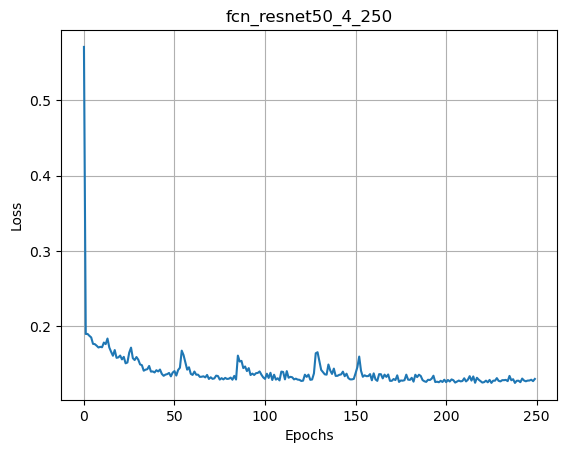

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot the loss
plot = True
new_name = name.split('/')[1]

# Print a graph of the loss 
plt.plot(loss)
plt.title(new_name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Split name
graph_name = f'{new_name}_loss.png'

# Save plot to graphs folder
if plot: plt.savefig(f'graphs/{graph_name}')